# Iris Analytics AI Coding Challenge
## Intro
Hello, and thank you for interviewing with us! At Iris Analytics, we're on a mission to provide companies and researchers with the best data science talent the world can offer. Our platform seeks to enable data science collaboration on a global scale, handled by our marketplace. To do this, we have to ensure that we only take the best and brightest. That means you!

## Challenge
This challenge is focused on necessary data science skills like cleaning, exploration, and visualization. Because the Iris marketplace has you bid hours on tasks, this challenge will be timed. It is not recommended that you spend more than 2 hours on this challenge.This is to ensure that our data scientists get paid fairly and can perform the work in reasonable amounts of time.

### Timing
The timing is defined by the timestamp of your first edit (logged in the revision history) and the timestamp of your emailed solution notebook.

### Questions?
If you have any questions about the challenge, feel free to email cprinzz@gmail.com.

### Summary
Scores will be determined based on your completeness and accuracy first, and your time second. No revisions can be made after the submission. We will get back to you within 48 hours with your result. Good luck, and again, thank you for your interest in becoming an Iris Analytics data scientist!

## Amazon Alexa Review Dataset

The imported dataset contains reviews from the Amazon Alexa. The goal of this challenge is to clean, explore, and visualize this data to create a sentiment analysis model to predict the rating based on the review text. Let's get started.

In [258]:
# Standard imports. You can import any other packages needed. You can install
# additional packages by using:
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Fetch dataset
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/patchworks-coding-challenge/amazon_alexa.tsv', sep='\t', encoding='utf-8')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## Cleaning

It's been discovered that all verified_reviews that are only say "love it" or are only one word are actually fake. Reviews like "great!" or "Love It!" need to be removed from the dataset.

In the cell below, remove one word and "love it" reviews from the dataset.

In [259]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: x.lower())
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

df['verified_reviews'] = df['verified_reviews'].apply(remove_punctuation)


In [260]:
df['verified_reviews'] = df['verified_reviews'].str.replace('\d+', '')

In [261]:
df.replace('loved it', 'love it', inplace=True)

In [262]:
df = df[df.verified_reviews != 'love it']

In [263]:
df.replace("'", "", inplace=True)

In [264]:
df.replace(' ', np.nan, inplace=True)
df = df.dropna()

In [265]:
df = df.drop_duplicates()

In [266]:
df = df[df['verified_reviews'].str.split().str.len() != 1]

In [267]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my yr...,1
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift i needed another...,1
6,3,31-Jul-18,Sandstone Fabric,without having a cellphone i cannot use many o...,1
7,5,31-Jul-18,Charcoal Fabric,i think this is the th one ive purchased im wo...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,love it i’ve listened to songs i haven’t heard...,1
10,5,30-Jul-18,Charcoal Fabric,i sent it to my year old dad and he talks to ...,1
11,5,30-Jul-18,Charcoal Fabric,i love it learning knew things with it eveyday...,1


## Visualization

In the cells below:
1.   Create a bar graph showing the number of reviews per day from the date of the first review to the date of the last review
2.   Create a histogram of ratings

All graphs must have labels for X and Y axes.



In [268]:
# Create a bar graph showing the number of reviews per day from the date of the
# first review to the date of the last review
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df.sort_values(by='date')

,rating,date,variation,verified_reviews,feedback
697,5,2018-05-16,Black,perfect condition,1
698,5,2018-05-16,Black,like new,1
696,5,2018-05-16,Black,i have no complaints as far as i know these ar...,1
695,5,2018-05-16,Black,like new no difference from new unused original,1
699,5,2018-05-16,White,it works just as well as the new version i got...,1
694,5,2018-05-17,Black,great product wakes me up every morning on time,1
693,5,2018-05-17,White,works perfect there’s no difference at all bet...,1
692,5,2018-05-17,Black,amazingly fun my daughter and i just asked que...,1
691,5,2018-05-17,Black,great price to extend the range and super valu...,1
690,5,2018-05-17,Black,works great,1


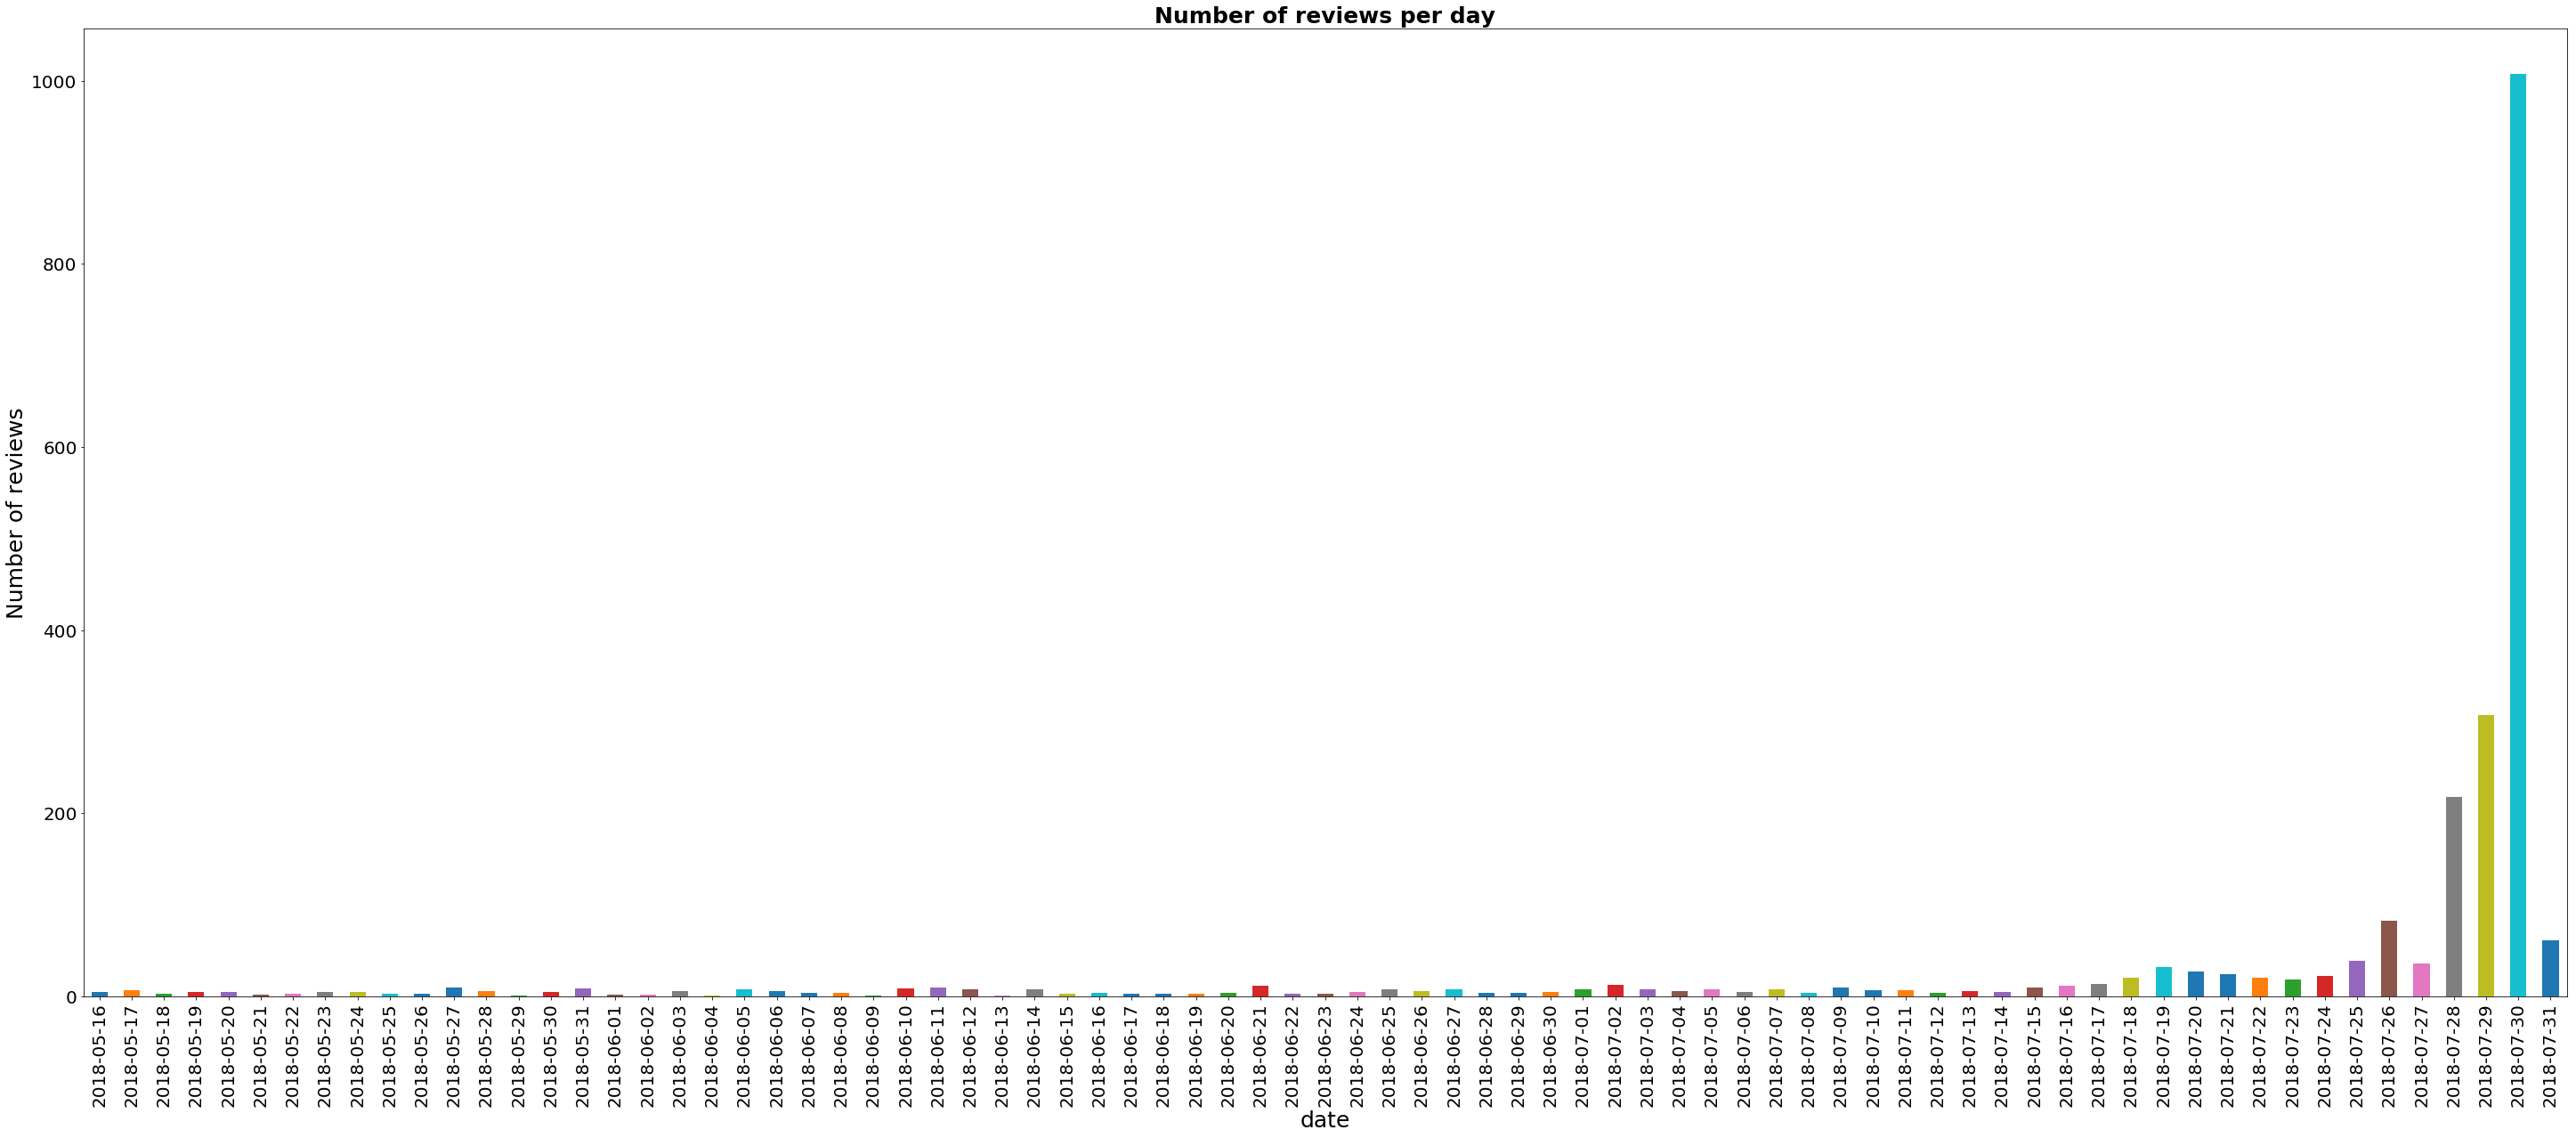

In [269]:
fig, ax = plt.subplots(figsize=(50,20))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of reviews per day', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of reviews', fontsize = 25) # Y label
ax.set_xlabel('Date', fontsize = 25) # X label
df.groupby(['date']).count()['verified_reviews'].plot(ax=ax, kind='bar')

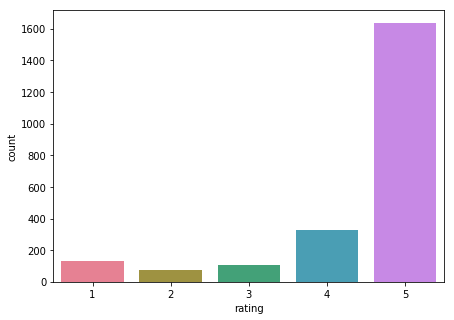

In [270]:
# Create a histogram of ratings
plt.figure(figsize = (7,5))
sns.countplot('rating', data = df, palette="husl")


## Exploration and Feature Engineering

Let's create some features for our model. Reminder: you are welcome to install and use any packages you wish.


1.   Create a new column called "verified_reviews_clean" that removes filler words from "verified_reviews" like "the", "a", "and", "I", etc. 
2.   Find the most common non-filler words for each rating score. Example:


```
Rating |ReviewsWith_love | ReviewsWith_laugh | ....
1               0                  1              
2               0                  2             
3               2                  1            
...

```

3.   Create dummy variables (1 or 0) for the presence of these words in each review.



In [271]:
#Remove columns we don't need anymore
df1 = df.drop(['date','variation', 'feedback'],axis=1)

In [272]:
# Create a new column called "verified_reviews_clean" that removes filler words
# from "verified_reviews" like "the", "a", "and", "I", etc.
#df1['verified_reviews_clean'] = df1['verified_reviews'].values.tolist()
df1['verified_reviews_clean'] = [nltk.tokenize.wordpunct_tokenize(text) for text in df1['verified_reviews']]
stopwords = nltk.corpus.stopwords.words('english')

df1['verified_reviews_clean'] = df1['verified_reviews_clean'].apply(lambda x: [item for item in x if item not in stopwords])

In [273]:
df1

,rating,verified_reviews,verified_reviews_clean
0,5,love my echo,"[love, echo]"
2,4,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,i have had a lot of fun with this thing my yr...,"[lot, fun, thing, yr, old, learns, dinosaurs, ..."
5,5,i received the echo as a gift i needed another...,"[received, echo, gift, needed, another, blueto..."
6,3,without having a cellphone i cannot use many o...,"[without, cellphone, cannot, use, many, featur..."
7,5,i think this is the th one ive purchased im wo...,"[think, th, one, ive, purchased, im, working, ..."
8,5,looks great,"[looks, great]"
9,5,love it i’ve listened to songs i haven’t heard...,"[love, ’, listened, songs, ’, heard, since, ch..."
10,5,i sent it to my year old dad and he talks to ...,"[sent, year, old, dad, talks, constantly]"
11,5,i love it learning knew things with it eveyday...,"[love, learning, knew, things, eveyday, still,..."


In [274]:
# Find the most common non-filler words for each rating score. Example:
# Rating |ReviewsWith_love | ReviewsWith_laugh | ....
# 1               0                  1              
# 2               0                  2             
# 3               2                  1            
# ...
df1['review_length'] = [len(t) for t in df1.verified_reviews]

#Filtering out positive and negative reviews

neg_review = df1[df1.rating == 1]
neg_words = []
for t in neg_review.verified_reviews:
    neg_words.append(t)

neg_text = pd.Series(neg_words).str.cat(sep=' ')

pos_review = df1[df1.rating == 5] 
pos_words = []
for t in pos_review.verified_reviews:
    pos_words.append(t)
    
pos_text = pd.Series(pos_words).str.cat(sep=' ')

In [275]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(stop_words='english',max_df = 0.85, ngram_range=(1,2))
cvector.fit(df1.verified_reviews)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.85, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [276]:
neg_matrix = cvector.transform(df1[df1.rating == 1].verified_reviews)
som_neg_matrix = cvector.transform(df1[df1.rating == 2].verified_reviews)
neu_matrix = cvector.transform(df1[df1.rating == 3].verified_reviews)
som_pos_matrix = cvector.transform(df1[df1.rating == 4].verified_reviews)
pos_matrix = cvector.transform(df1[df1.rating == 5].verified_reviews)

In [277]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [278]:
neg_tf.head()

,Terms,negative
0,echo,43
1,amazon,40
2,work,24
3,product,23
4,dot,23


In [279]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
echo,43
amazon,40
work,24
product,23
dot,23


In [280]:
som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_tf_df = som_neg_tf.set_index('Terms')
som_neg_tf_df.head()

,some-negative
Terms,
echo,38
alexa,28
device,26
like,23
just,21


In [281]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head()

,neutral
Terms,
alexa,46
echo,42
like,28
dot,22
sound,19


In [282]:
som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')
som_pos_words_tf_df.head()

,some-positive
Terms,
echo,120
great,91
alexa,87
like,82
use,77


In [283]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
love,617
great,424
echo,409
alexa,296
use,250


In [284]:
term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [285]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(30)

,negative,some-negative,neutral,some-positive,positive,total
love,5,1,7,69,617,699
echo,43,38,42,120,409,652
great,10,5,11,91,424,541
alexa,17,28,46,87,296,474
like,14,23,28,82,235,382
use,11,16,13,77,250,367
music,6,15,18,71,245,355
works,17,5,13,52,218,305
easy,1,0,5,30,230,266
just,18,21,16,44,163,262


##### Create dummy variables (1 or 0) for the presence of these words in each review.

## Prediction

Create a model using your new features to predict the rating score given the review.


1.   Split the dataset into a training and test set using the method of your choice.
2.   Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible. In the text cell, explain how you chose your model and loss function.



In [307]:
review = np.array(df1['verified_reviews'])
rating = np.array(df1['rating'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
review_train, review_test, rating_train, rating_test = train_test_split(review, rating, test_size=0.3, random_state=4)

In [308]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build BagOfWords on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(review_train)

In [309]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(review_train)

In [310]:
# transform test reviews into features
cv_test_features = cv.transform(review_test)
tv_test_features = tv.transform(review_test)

In [311]:
####Evaluation metrics


from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [312]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
sgd = SGDClassifier(loss='hinge', n_iter=100)

In [313]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=rating_train,
                                               test_features=tv_test_features, test_labels=rating_test)
display_model_performance_metrics(true_labels=rating_test, predicted_labels=lr_tfidf_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.72770000000000001)
('Precision:', 0.53029999999999999)
('Recall:', 0.72770000000000001)
('F1 Score:', 0.61350000000000005)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        89
           5       0.73      1.00      0.84       497

   micro avg       0.73      0.73      0.73       683
   macro avg       0.15      0.20      0.17       683
weighted avg       0.53      0.73      0.61       683


Prediction Confusion Matrix:
------------------------------
          Predicted:              
                   1  2  3  4    5
Actual: 1          0  0  0  0   33
        2          0  0  0  0   28
        3          0  0  0  1   35
        4        

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [314]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=rating_train,
                                             test_features=cv_test_features, test_labels=rating_test)
display_model_performance_metrics(true_labels=rating_test, predicted_labels=lr_bow_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.74380000000000002)
('Precision:', 0.6643)
('Recall:', 0.74380000000000002)
('F1 Score:', 0.6825)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.46      0.18      0.26        33
           2       0.25      0.04      0.06        28
           3       0.25      0.03      0.05        36
           4       0.36      0.19      0.25        89
           5       0.79      0.97      0.87       497

   micro avg       0.74      0.74      0.74       683
   macro avg       0.42      0.28      0.30       683
weighted avg       0.66      0.74      0.68       683


Prediction Confusion Matrix:
------------------------------
          Predicted:               
                   1  2  3   4    5
Actual: 1          6  2  1   3   21
        2          5  1  1   5   16
        3          2  1  1   9   23
        4          0  0  0  17   72
  

In [315]:
# SGD model on Countvectorizer
sgd_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=rating_train,
                                             test_features=cv_test_features, test_labels=rating_test)
display_model_performance_metrics(true_labels=rating_test, predicted_labels=sgd_bow_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.6764)
('Precision:', 0.65549999999999997)
('Recall:', 0.6764)
('F1 Score:', 0.66069999999999995)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.36      0.24      0.29        33
           2       0.29      0.07      0.11        28
           3       0.28      0.14      0.19        36
           4       0.20      0.24      0.21        89
           5       0.81      0.86      0.83       497

   micro avg       0.68      0.68      0.68       683
   macro avg       0.39      0.31      0.33       683
weighted avg       0.66      0.68      0.66       683


Prediction Confusion Matrix:
------------------------------
          Predicted:               
                   1  2  3   4    5
Actual: 1          8  2  1  11   11
        2          4  2  2   9   11
        3          3  1  5   8   19
        4          1  0  5  21   62
  

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [316]:
# SGD model on TF-IDF
sgd_tfidf_predictions = train_predict_model(classifier=sgd, 
                                                train_features=tv_train_features, train_labels=rating_train,
                                                test_features=tv_test_features, test_labels=rating_test)
display_model_performance_metrics(true_labels=rating_test, predicted_labels=sgd_tfidf_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.73650000000000004)
('Precision:', 0.68340000000000001)
('Recall:', 0.73650000000000004)
('F1 Score:', 0.7026)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.57      0.36      0.44        33
           2       0.00      0.00      0.00        28
           3       0.33      0.08      0.13        36
           4       0.31      0.31      0.31        89
           5       0.82      0.93      0.87       497

   micro avg       0.74      0.74      0.74       683
   macro avg       0.41      0.34      0.35       683
weighted avg       0.68      0.74      0.70       683


Prediction Confusion Matrix:
------------------------------
          Predicted:               
                   1  2  3   4    5
Actual: 1         12  1  1   8   11
        2          5  0  1   8   14
        3          3  0  3  15   15
        4          0  0  

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [320]:
We were impressed by your response overall and how you solved the problem. That being said, the truth is that we don't have a large volume of client projects right now, so we wanted to cap the number of data scientists in our beta to about 2. We'll definitely be reaching out later in the year when we've gotten more client work.

Let me know if you have any other questions!

Best,
Chris

### Explain how you chose your model and loss function.

## Bonus Points
For bonus points, write a sentence or two about how you could further improve your model. This is not required.

## Conclusion
Thanks for completing the Iris Analytics Data Science Challenge! Submit your notebook to cprinzz@gmail.com for review. We'll get back to you within 48 hours with your results. You can download your notebook by clicking File > Download .ipynb.